<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Static Dislocation Results
import numpy as np
import math
import matplotlib.pyplot as plt
import random
 
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
def B(delE):
  
  # The metropolis funtion. The multiplier 200 is taken by using the constants
  # in ΔE/kT. It will vary is specific systems are used or other values are taken.  
  
  deE = -delE * 200
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  if dE < -5:
    U = 0
    
  return min(U, 1)

def E( X, Y, W, H):

  # The Energy funtion for the interaction between solute and dislocation. We do
  # not use the values of other variables as they are collectively assumed to a 
  # value in the metropolis function. 
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans


In [ ]:
#entering parameters for the simulation.

conc = float (input("Enter percentage concentration of solute: "))
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))

Enter percentage concentration of solute: 0.5
Enter Width of the simulation cell: 200
Enter Height of the simulation cell: 100


In [ ]:
#initializing array  and randomly distributing solutes in the matrix

array = np.zeros((W, H), int)

sol_loc = [] # represents an array with the locations of the solute atoms. 
loc_set = set() # a set containing the locations of the solute atoms and the dislocation. 

sol = (H*W*conc)/100
a = 0

x_dis = int (W/2)
y_dis = int (H/2)

array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis))

while (a < sol):
  i = random.randint(0, W-1)
  j = random.randint(0, H-1)

  if array[i][j] == 0:
    array[i][j] = 1
    a += 1
    loc_set.add((i, j))
    sol_loc.append([i, j])   
      
  if (a==sol): 
    break 


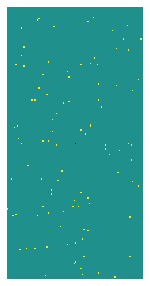

In [ ]:
#projecting the array as image

plt.rcParams["figure.figsize"] = (5,5) # represents the dimensions of the image.
# can be varied to suit the dimensions of the simulation cell. 

plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

In [ ]:
# Running the simulation.


iter = int (input("Enter Number of Iterations: "))
for i in range (0, iter):
    
   # The if statement is the code for downloading the of the simulation cell. 
   # Create a folder image on the device and copy the path and replace it with 
   # "Image" in the below code. This is the most time consuming step. As such for
   # only observation we can reduce the frequency of image collection.
   if i%100 == 0:
     name = r"Image/download" + str (int( i/100)) + ".png"
     plt.rcParams["figure.figsize"] = (5,5)
     plt.grid(False)
     plt.axis('off')
     image = plt.imshow(array, interpolation='nearest')
     plt.savefig(name)

    n = random.randint(0, sol-1) # selecting a random solute.
    x = sol_loc[n][0]
    y = sol_loc[n][1]
  
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set): # feasibility of jump
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()
        b = B(delE)

        if n < b:
          m = random.random()
          if delE*200 < 0 or m>0.8:
            array[x][y] = 0
            array[xi][yi] = 1

            loc_set.remove((x, y))
            loc_set.add((xi, yi))
            sol_loc.append([xi, yi])
            sol_loc.remove([x, y])
            
            break

In [ ]:
#projecting the array as image
plt.rcParams["figure.figsize"] = (5,5)
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

In [ ]:
# if used in colab this code can be used to create a downloadable zip file. 
!zip -r /content/Image.zip /content/Image

  adding: content/Image/ (stored 0%)
  adding: content/Image/download24.png (deflated 52%)
  adding: content/Image/download35.png (deflated 57%)
  adding: content/Image/download40.png (deflated 59%)
  adding: content/Image/download11.png (deflated 46%)
  adding: content/Image/download41.png (deflated 59%)
  adding: content/Image/download36.png (deflated 57%)
  adding: content/Image/download0.png (deflated 41%)
  adding: content/Image/download26.png (deflated 55%)
  adding: content/Image/download48.png (deflated 57%)
  adding: content/Image/download4.png (deflated 46%)
  adding: content/Image/download18.png (deflated 50%)
  adding: content/Image/download38.png (deflated 59%)
  adding: content/Image/download10.png (deflated 45%)
  adding: content/Image/download20.png (deflated 51%)
  adding: content/Image/download30.png (deflated 55%)
  adding: content/Image/download34.png (deflated 56%)
  adding: content/Image/download8.png (deflated 46%)
  adding: content/Image/download31.png (deflated